Read in Data

In [7]:
import pandas as pd

TRAIN = pd.read_csv("train_crime.csv")
TEST = pd.read_csv("test_crime.csv")

print(TRAIN.head())
print(TEST.head())

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

Tree Model 1: Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

TRAIN['Dates'] = pd.to_datetime(TRAIN['Dates'])
TRAIN['Hour'] = TRAIN['Dates'].dt.hour
TRAIN['Month'] = TRAIN['Dates'].dt.month
TRAIN['Year'] = TRAIN['Dates'].dt.year

TEST['Dates'] = pd.to_datetime(TEST['Dates'])
TEST['Hour'] = TEST['Dates'].dt.hour
TEST['Month'] = TEST['Dates'].dt.month
TEST['Year'] = TEST['Dates'].dt.year

label_day = LabelEncoder()
label_dist = LabelEncoder()
label_cat = LabelEncoder()

TRAIN['DayOfWeek'] = label_day.fit_transform(TRAIN['DayOfWeek'])
TRAIN['PdDistrict'] = label_dist.fit_transform(TRAIN['PdDistrict'])
TRAIN['Category'] = label_cat.fit_transform(TRAIN['Category'])

TEST['DayOfWeek'] = label_day.transform(TEST['DayOfWeek'])
TEST['PdDistrict'] = label_dist.transform(TEST['PdDistrict'])

features = ['DayOfWeek', 'PdDistrict', 'Hour', 'Month', 'Year', 'X', 'Y']
X = TRAIN[features]
y = TRAIN['Category']
X_test = TEST[features]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8555)

model = DecisionTreeClassifier(max_depth=10, random_state=8555)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=label_cat.classes_))



C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       285
                    ASSAULT       0.16      0.09      0.12     15273
                 BAD CHECKS       0.00      0.00      0.00        83
                    BRIBERY       0.00      0.00      0.00        67
                   BURGLARY       0.14      0.01      0.01      7441
         DISORDERLY CONDUCT       0.22      0.05      0.08       859
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       412
              DRUG/NARCOTIC       0.32      0.40      0.35     10777
                DRUNKENNESS       0.00      0.00      0.00       875
               EMBEZZLEMENT       0.00      0.00      0.00       233
                  EXTORTION       0.00      0.00      0.00        45
            FAMILY OFFENSES       0.00      0.00      0.00       100
     FORGERY/COUNTERFEITING       0.11      0.00      0.00      2086
                      FRAUD      

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add Predictions to Test Set

In [ ]:

probs = model.predict_proba(X_test)


probs_df = pd.DataFrame(probs, columns=label_cat.classes_)


probs_df.insert(0, 'Id', TEST['Id'].values)

print(probs_df.head())


#probs_df.to_csv('decision_tree_submission.csv', index=False)


   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.003282  0.129923    0.000137  0.000274  0.026395            0.000684   
1   1  0.003542  0.122634    0.000332  0.000996  0.026674            0.001771   
2   2  0.001278  0.053035    0.000568  0.000213  0.086333            0.001420   
3   3  0.001002  0.094888    0.000000  0.000668  0.022386            0.002339   
4   4  0.001002  0.094888    0.000000  0.000668  0.022386            0.002339   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.003009       0.035832     0.001915  ...   
1                     0.002435       0.086552     0.003542  ...   
2                     0.002201       0.018459     0.002698  ...   
3                     0.004343       0.047778     0.003341  ...   
4                     0.004343       0.047778     0.003341  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000000       

Decision Tree Assumption:

Data can be split using predictor variables: Passed. We see non-zero feature importances for the predictor variables in this model. However, day of week and month contribute significantly less to our model. This is also supported by the tree having a depth of 10 and 967 leaves.

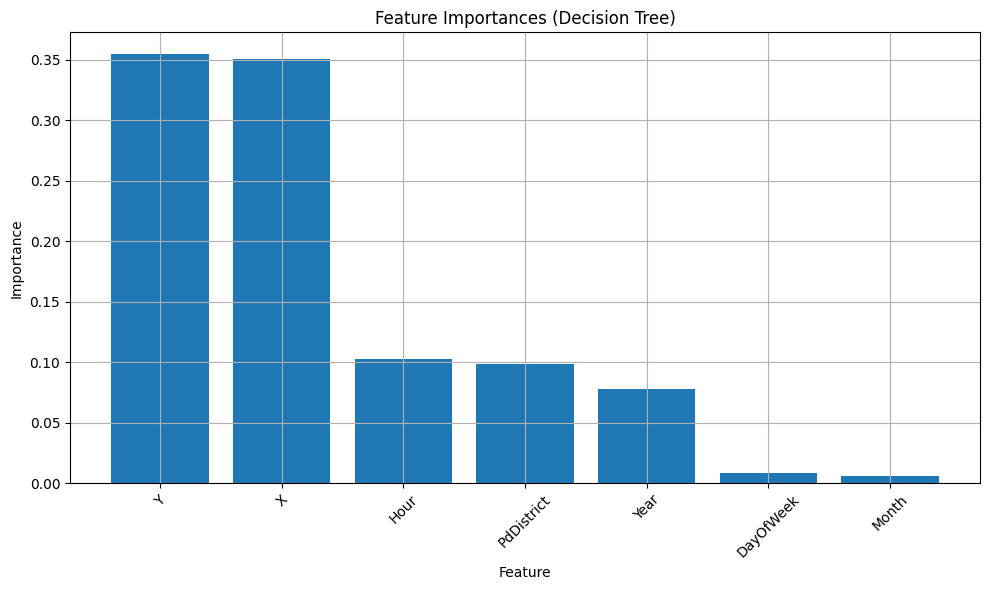

Tree depth: 10
Number of leaves: 967


In [ ]:
#Feature Importance plot and depth and leaves
import matplotlib.pyplot as plt
import numpy as np


importances = model.feature_importances_
feature_names = features


indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importances (Decision Tree)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.grid(True)
plt.show()

print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")


Tree Model 2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=8555)
rf_model.fit(X_train, y_train)


rf_pred = rf_model.predict(X_val)
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, rf_pred, target_names=label_cat.classes_))



Random Forest Classification Report:


C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       285
                    ASSAULT       0.27      0.01      0.03     15273
                 BAD CHECKS       0.00      0.00      0.00        83
                    BRIBERY       0.00      0.00      0.00        67
                   BURGLARY       0.00      0.00      0.00      7441
         DISORDERLY CONDUCT       0.00      0.00      0.00       859
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       412
              DRUG/NARCOTIC       0.32      0.37      0.34     10777
                DRUNKENNESS       0.00      0.00      0.00       875
               EMBEZZLEMENT       0.00      0.00      0.00       233
                  EXTORTION       0.00      0.00      0.00        45
            FAMILY OFFENSES       0.00      0.00      0.00       100
     FORGERY/COUNTERFEITING       0.00      0.00      0.00      2086
                      FRAUD      

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Add predictions on test data

In [ ]:

rf_probs = rf_model.predict_proba(X_test)


rf_probs_df = pd.DataFrame(rf_probs, columns=label_cat.classes_)

rf_probs_df.insert(0, 'Id', TEST['Id'].values)

print(rf_probs_df.head())
print(rf_probs_df.shape)

#rf_probs_df.to_csv('random_forest_submission.csv', index=False)

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.003314  0.109329    0.000169  0.000494  0.028491            0.001447   
1   1  0.004170  0.132825    0.000144  0.000823  0.024842            0.001987   
2   2  0.003403  0.057331    0.000152  0.000092  0.062823            0.001149   
3   3  0.002314  0.096308    0.000279  0.000662  0.026882            0.002428   
4   4  0.002314  0.096308    0.000279  0.000662  0.026882            0.002428   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.005861       0.031247     0.002183  ...   
1                     0.003761       0.061704     0.005297  ...   
2                     0.002708       0.017172     0.004693  ...   
3                     0.005768       0.029133     0.003500  ...   
4                     0.005768       0.029133     0.003500  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000150       

Random Forest Model Assumptions

Combination of decision trees will reduce variance and improve predictions without adding bias. Failed.

We see similar accuracy between decision tree and random forest. Also, we see a worse weighted average precision and f1-score for the random forest model. This suggests that the RF model was unable to reduce variance and improve predictions. 

Diversity of Trees: Failed. The feature importance plot shows some diversity, suggesting that the model is attempting to balance feature contributions across trees. However, large differences between feature importances indicate that certain features still dominate the predictions 

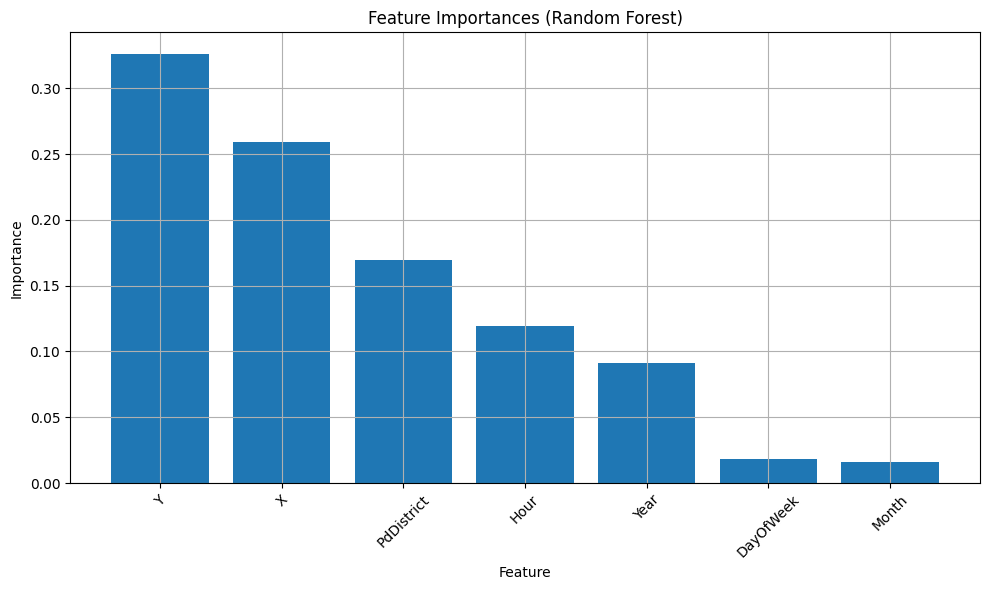

Average prediction variance across trees: 20.66368310387645


In [ ]:
# Feature importance plot
import matplotlib.pyplot as plt
import numpy as np

rf_importances = rf_model.feature_importances_
feature_names = features

indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_importances)), rf_importances[indices], align='center')
plt.xticks(range(len(rf_importances)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.grid(True)
plt.show()


SVM Model

Generating a Representative Sample Size for 95% conf: About 9604 say 10,000

Z=1.96

p=0.5

e=0.01


In [ ]:
#did this to ensure original data for new model
import pandas as pd

TRAIN = pd.read_csv("train_crime.csv")
TEST = pd.read_csv("test_crime.csv")

print(TRAIN.head())



                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import StratifiedShuffleSplit

TRAIN['Dates'] = pd.to_datetime(TRAIN['Dates'])
TRAIN['Hour'] = TRAIN['Dates'].dt.hour
TRAIN['Month'] = TRAIN['Dates'].dt.month
TRAIN['Year'] = TRAIN['Dates'].dt.year

TEST['Dates'] = pd.to_datetime(TEST['Dates'])
TEST['Hour'] = TEST['Dates'].dt.hour
TEST['Month'] = TEST['Dates'].dt.month
TEST['Year'] = TEST['Dates'].dt.year

label_day = LabelEncoder()
label_dist = LabelEncoder()
label_cat = LabelEncoder()

TRAIN['DayOfWeek'] = label_day.fit_transform(TRAIN['DayOfWeek'])
TRAIN['PdDistrict'] = label_dist.fit_transform(TRAIN['PdDistrict'])
TRAIN['Category'] = label_cat.fit_transform(TRAIN['Category'])

TEST['DayOfWeek'] = label_day.transform(TEST['DayOfWeek'])
TEST['PdDistrict'] = label_dist.transform(TEST['PdDistrict'])

features = ['DayOfWeek', 'PdDistrict', 'Hour', 'Month', 'Year', 'X', 'Y']
X_full = TRAIN[features]
y_full = TRAIN['Category']


strat_split = StratifiedShuffleSplit(n_splits=1, train_size=20000, random_state=8555)

for strat_index, _ in strat_split.split(X_full, y_full):
    X_sample = X_full.iloc[strat_index]
    y_sample = y_full.iloc[strat_index]

X_train, X_val, y_train, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=8555)


svm_model = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', probability=True, C=1.0, random_state=8555)
)


svm_model.fit(X_train, y_train)


svm_pred = svm_model.predict(X_val)



present_labels = sorted(unique_labels(y_val, svm_pred))


if len(present_labels) == 1:
    present_class_names = [label_cat.classes_[present_labels[0]]]
else:
    present_class_names = label_cat.inverse_transform(present_labels).tolist()


print("\nLinear SVM Classification Report:")
print(classification_report(
    y_val, svm_pred,
    labels=present_labels,
    target_names=present_class_names
))








Linear SVM Classification Report:
                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00         6
                    ASSAULT       0.00      0.00      0.00       335
                    BRIBERY       0.00      0.00      0.00         1
                   BURGLARY       0.00      0.00      0.00       171
         DISORDERLY CONDUCT       0.00      0.00      0.00        17
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00        13
              DRUG/NARCOTIC       0.00      0.00      0.00       245
                DRUNKENNESS       0.00      0.00      0.00        21
               EMBEZZLEMENT       0.00      0.00      0.00         5
                  EXTORTION       0.00      0.00      0.00         1
            FAMILY OFFENSES       0.00      0.00      0.00         2
     FORGERY/COUNTERFEITING       0.00      0.00      0.00        44
                      FRAUD       0.00      0.00      0.00        6

C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

Test Predictions

In [ ]:

X_test = TEST[features]
svm_test_probs = svm_model.predict_proba(X_test)


learned_class_names = [label_cat.classes_[i] for i in svm_model.classes_]
svm_probs_df = pd.DataFrame(svm_test_probs, columns=learned_class_names)

all_class_names = list(label_cat.classes_)
for cls in all_class_names:
    if cls not in svm_probs_df.columns:
        svm_probs_df[cls] = 0.0  


svm_probs_df = svm_probs_df[sorted(all_class_names)]


svm_probs_df.insert(0, 'Id', TEST['Id'].values)




In [ ]:

print(svm_probs_df.head())
print(svm_probs_df.shape)


#svm_probs_df.to_csv('svm_submission.csv', index=False)

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.001729  0.104613    0.000714  0.000565  0.041501            0.004241   
1   1  0.001731  0.107463    0.000729  0.000584  0.040320            0.004205   
2   2  0.001965  0.076105    0.000663  0.000433  0.042908            0.005197   
3   3  0.001727  0.103708    0.000773  0.000579  0.044136            0.004252   
4   4  0.001727  0.103708    0.000773  0.000579  0.044136            0.004252   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.002439       0.051947     0.003528  ...   
1                     0.002378       0.055412     0.003478  ...   
2                     0.002779       0.049291     0.005168  ...   
3                     0.002786       0.044580     0.003377  ...   
4                     0.002786       0.044580     0.003377  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  TREA  \
0                   0.000473 

SVM Assumptions:

Independent Observation: Passed. Durbin watson close to 2 indicates no autocorrelation and observations are independent 

Identically Distributed Data: Passed. KS test large p-value suggest failure to reject null hypothesis that data is identically distributed.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import ks_2samp

residuals = y_val.values - svm_pred

#Durbin Watson
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

# KS test "smirnov test"
residuals = y_val.values - svm_pred

np.random.seed(8555)  
bootstrapped_residuals = np.random.choice(residuals, size=len(residuals), replace=True)

ks_stat, ks_pvalue = ks_2samp(residuals, bootstrapped_residuals)

print(f"KS Test p-value (residuals vs. bootstrap residuals): {ks_pvalue:.4f}")



Durbin-Watson Statistic: 1.9496
KS Test p-value (residuals vs. bootstrap residuals): 0.9012
